### Init


In [1]:
# Loading the libraries
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import random
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

In [2]:
all_data = pd.read_csv('https://raw.githubusercontent.com/Sm2468/msc_thesis/master/Preprocessed_datasets/preprocessed_wine.csv', index_col=0)
errors = all_data['errors']
clustering_features_preprocessed = all_data.drop(['predicted_class', 'true_class', 'errors'], axis=1)

In [3]:
# Scaling the features 
to_scale = clustering_features_preprocessed.columns
clustering_features_preprocessed[to_scale] = StandardScaler().fit_transform(clustering_features_preprocessed[to_scale])
clustering_features_preprocessed[:5]

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
12,0.687846,-0.160373,0.141557,-0.694417,-0.834587,0.004312,0.267992,-0.318793,0.017405,0.697247,0.405843,-0.146241,1.256507
23,-0.356751,-0.343481,0.502356,-0.101678,-0.381526,-0.222556,-0.278564,-0.635733,-0.650337,-0.367414,-0.033392,1.394286,0.408775
25,-0.124619,0.290352,2.798346,2.269277,1.808272,0.061029,0.155878,1.582845,0.227267,-0.590546,0.259431,0.486852,-0.105424
35,0.374467,-0.047692,0.141557,0.787430,-0.003974,0.193369,0.576306,-0.635733,0.112797,0.378486,-0.399421,1.056636,0.144727
13,1.848509,-0.160373,0.075958,-2.209194,-0.683567,0.949596,1.571320,1.160258,1.925240,0.569743,1.137900,-0.504994,0.784001


### Utils

In [4]:
# TODO: experiment with differen random states, increase number of runs
clus_model_kwargs = {
    "init": "k-means++",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 2,
}


In [5]:
# plotting the cluster assignments to check whether the clusters make sense
# TODO convert clustering dimensions to PCA to plot on 2-dimensional axis 
def plot_clusters(data):
#     pca = PCA(n_components=2)
#     transformed = pd.DataFrame({"axis1": np.zeros(len(data)), "axis2" : np.zeros(len(data))})
#     transformed["axis1","axis2"] = pca.fit_transform(data.drop("clusters", axis=1), y=None)
#     transformed["clusters"] = data["clusters"]
    
    scatterplot = sns.scatterplot(data=data, x="alcohol", y="ash", hue="clusters", size='errors', sizes=(100, 20), palette="tab10")
    plt.show()

In [6]:
def accuracy(results):
    correct = results.loc[results['errors'] == 0]
    # print('Correct:', len(correct), ' -  Total:', len(results))
    acc = len(correct)/len(results)
    # print('Accuracy:', acc)
    return acc

def bias_acc(data, cluster_id, cluster_col):
    cluster_x = data.loc[data[cluster_col] == cluster_id]
    remaining_clusters = data.loc[data[cluster_col] != cluster_id]
    return accuracy(remaining_clusters) - accuracy(cluster_x)

def get_next_cluster(data):
    n_cluster = max(data['clusters'])
    highest_variance = -1
    cluster_number = 0

    for i in range(0, n_cluster):
        cluster_i = data.loc[data['clusters'] == i]
        variance_cluster = np.var(cluster_i['errors'])
        
        if variance_cluster > highest_variance:
            highest_variance = variance_cluster
            cluster_number = i
            print('--> Cluster with the highest variance:', cluster_number)

    return cluster_number

### Clustering

In [7]:
# Combine scaled features w. class & error labels
full_data = clustering_features_preprocessed.copy(deep=True)
full_data['true_class'] = all_data[['true_class']]
full_data['predicted_class'] = all_data[['predicted_class']]
full_data['errors'] = all_data[['errors']]
full_data['clusters'] = 0
full_data['new_clusters'] = -1
full_data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,true_class,predicted_class,errors,clusters,new_clusters
12,0.687846,-0.160373,0.141557,-0.694417,-0.834587,0.004312,0.267992,-0.318793,0.017405,0.697247,0.405843,-0.146241,1.256507,0.0,0,0.0,0,-1
23,-0.356751,-0.343481,0.502356,-0.101678,-0.381526,-0.222556,-0.278564,-0.635733,-0.650337,-0.367414,-0.033392,1.394286,0.408775,0.0,1,1.0,0,-1
25,-0.124619,0.290352,2.798346,2.269277,1.808272,0.061029,0.155878,1.582845,0.227267,-0.590546,0.259431,0.486852,-0.105424,0.0,0,0.0,0,-1
35,0.374467,-0.047692,0.141557,0.787430,-0.003974,0.193369,0.576306,-0.635733,0.112797,0.378486,-0.399421,1.056636,0.144727,0.0,1,1.0,0,-1
13,1.848509,-0.160373,0.075958,-2.209194,-0.683567,0.949596,1.571320,1.160258,1.925240,0.569743,1.137900,-0.504994,0.784001,0.0,2,1.0,0,-1


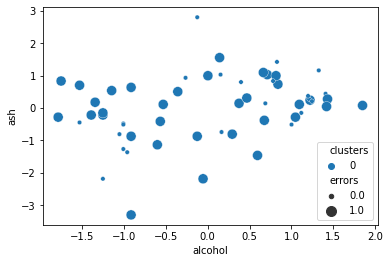

----- Clustering Iteration 1
Splitting on cluster 0


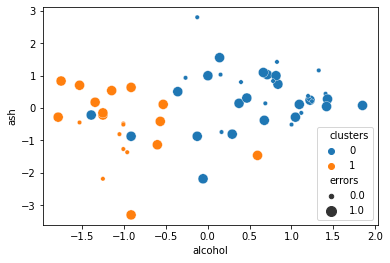

--> Cluster with the highest variance: 0
----- Clustering Iteration 2
Splitting on cluster 0


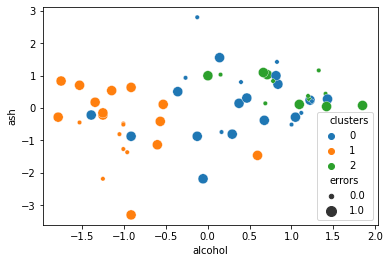

--> Cluster with the highest variance: 0
--> Cluster with the highest variance: 1
----- Clustering Iteration 3
Splitting on cluster 1


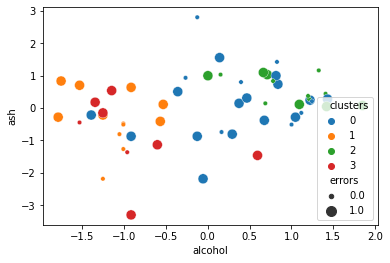

--> Cluster with the highest variance: 0
--> Cluster with the highest variance: 1
--> Cluster with the highest variance: 2
----- Clustering Iteration 4
Splitting on cluster 2


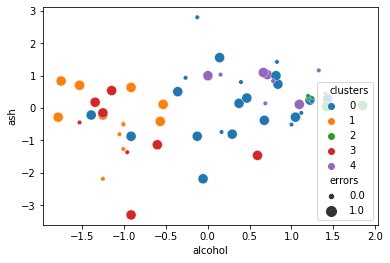

--> Cluster with the highest variance: 0
--> Cluster with the highest variance: 1
----- Clustering Iteration 5
Splitting on cluster 1


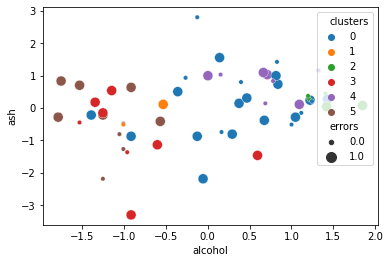

--> Cluster with the highest variance: 0
--> Cluster with the highest variance: 1
----- Clustering Iteration 6
Splitting on cluster 1
The selected cluster is not splitted. Picking a random cluster...
----- Clustering Iteration 7
Splitting on cluster 5


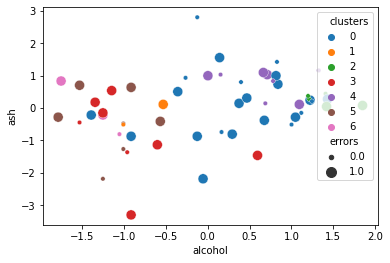

--> Cluster with the highest variance: 0
--> Cluster with the highest variance: 1
----- Clustering Iteration 8
Splitting on cluster 1
The selected cluster is not splitted. Picking a random cluster...
----- Clustering Iteration 9
Splitting on cluster 6
The selected cluster is not splitted. Picking a random cluster...
----- Clustering Iteration 10
Splitting on cluster 4


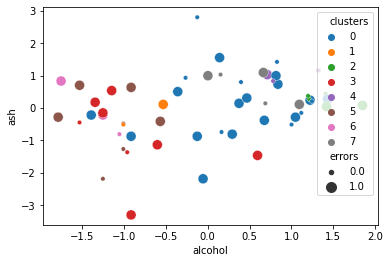

--> Cluster with the highest variance: 0
--> Cluster with the highest variance: 1
----- Clustering Iteration 11
Splitting on cluster 1
The selected cluster is not splitted. Picking a random cluster...
----- Clustering Iteration 12
Splitting on cluster 0


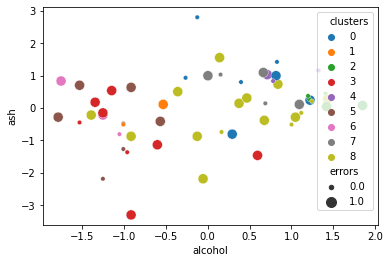

--> Cluster with the highest variance: 0
--> Cluster with the highest variance: 1
----- Clustering Iteration 13
Splitting on cluster 1
The selected cluster is not splitted. Picking a random cluster...
----- Clustering Iteration 14
Splitting on cluster 7
The selected cluster is not splitted. Picking a random cluster...
----- Clustering Iteration 15
Splitting on cluster 0
The selected cluster is not splitted. Picking a random cluster...
----- Clustering Iteration 16
Splitting on cluster 8


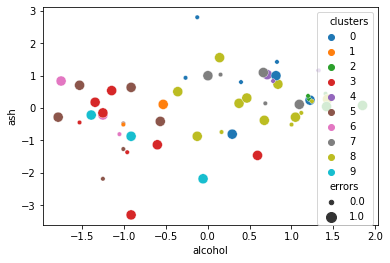

--> Cluster with the highest variance: 0
--> Cluster with the highest variance: 1
----- Clustering Iteration 17
Splitting on cluster 1
The selected cluster is not splitted. Picking a random cluster...
----- Clustering Iteration 18
Splitting on cluster 2
The selected cluster is not splitted. Picking a random cluster...
----- Clustering Iteration 19
Splitting on cluster 0
The selected cluster is not splitted. Picking a random cluster...
MAX_ITER


In [8]:
MAX_ITER = 20
x = 0 # cluster number
initial_bias = 0
plot_clusters(full_data)

for i in range(1, MAX_ITER):
    print('----- Clustering Iteration', i)
    print('Splitting on cluster', x)

    full_data['new_clusters'] = -1
    candidate_cluster = full_data.loc[full_data['clusters'] == x] 
    # print(candidate_cluster.head())

    if len(candidate_cluster) < 8:
        print('The selected cluster is not splitted. Picking a random cluster...')
        n_cluster = max(full_data['clusters'])
        x = random.randint(0, n_cluster)
        initial_bias = abs(bias_acc(full_data, x, 'clusters'))
        continue
    
    # Apply Kmeans 
    kmeans_algo = KMeans(n_clusters=2, **clus_model_kwargs).fit(candidate_cluster.drop(['clusters', 'new_clusters', 'predicted_class', 'true_class', 'errors'], axis=1)) #!!!# (high_bias_cluster) 
    
    candidate_cluster['new_clusters'] = pd.DataFrame(kmeans_algo.predict(candidate_cluster.drop(['clusters', 'new_clusters', 'predicted_class', 'true_class', 'errors'], axis=1)),index=candidate_cluster.index) 
    # print(candidate_cluster.head())

    full_data['new_clusters'] = candidate_cluster['new_clusters'].combine_first(full_data['new_clusters'])
    # print(full_data.head())
        
    # calculate bias & cluster size for each of the two clusters
    negative_bias_0 = bias_acc(full_data, 0, 'new_clusters')
    negative_bias_1 = bias_acc(full_data, 1, 'new_clusters') 
    max_abs_bias = max(abs(negative_bias_0), abs(negative_bias_1))
    min_new_size = min( len(full_data.loc[full_data['new_clusters']==0]), len(full_data.loc[full_data['new_clusters']==1]) )
    
    if (max_abs_bias >= initial_bias) & (min_new_size > 1): 
        # Add new cluster
        n_cluster = max(full_data['clusters'])
        full_data['clusters'][full_data['new_clusters'] == 1] =  n_cluster + 1
        #print(full_data.head())
        
        plot_clusters(full_data)

        x = get_next_cluster(full_data)
        initial_bias = abs(bias_acc(full_data, x, 'clusters'))
    else:
        print('Initial bias:', initial_bias, '  -  Max abs. candidate bias:', max_abs_bias)
        print('Min candidate size:', min_new_size)
        print('The selected cluster is not splitted. Picking a random cluster...')
        n_cluster = max(full_data['clusters'])
        x = random.randint(0, n_cluster)
        initial_bias = abs(bias_acc(full_data, x, 'clusters'))
        
print('MAX_ITER')

In [9]:
# exporting the biased cluster dataframe for further analysis
full_data.to_csv('biased_wine_clusters.csv')